In [5]:
!pip install kaggle

In [6]:
import os
import shutil

# Path to your downloaded kaggle.json (update this path if needed)
source = "kaggle.json"  # Make sure it's in the same folder as this script or provide full path

# Destination directory
destination_dir = os.path.expanduser("~/.kaggle")
os.makedirs(destination_dir, exist_ok=True)

# Move the file
shutil.copy(source, os.path.join(destination_dir, "kaggle.json"))

# Set permission (only needed on Linux/macOS)
try:
    os.chmod(os.path.join(destination_dir, "kaggle.json"), 0o600)
except:
    pass  # Skip on Windows or if chmod fails silently

print("✅ kaggle.json moved to ~/.kaggle and permissions set (if needed).")


✅ kaggle.json moved to ~/.kaggle and permissions set (if needed).


In [7]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset


Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
brain-tumor-mri-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
import zipfile
import os

# Paths
zip_path = "brain-tumor-mri-dataset.zip"
extract_path = "brain_tumor_dataset"

# Create folder if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"✅ Extracted to: {extract_path}")


✅ Extracted to: brain_tumor_dataset


In [9]:
!pip install opencv-python


In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from PIL import Image 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle, class_weight 
import tensorflow as tf
from tensorflow import keras


In [11]:
with_training_data = os.listdir("brain_tumor_dataset/Training")

In [12]:
with_training_data

['glioma', 'meningioma', 'notumor', 'pituitary']

In [13]:
with_test_data = os.listdir("brain_tumor_dataset/Testing")

In [14]:
with_test_data

['glioma', 'meningioma', 'notumor', 'pituitary']

In [15]:
print(f" length of train data:",len(with_training_data))

 length of train data: 4


In [16]:
glioma = print(len(os.listdir('brain_tumor_dataset/Training/glioma')))

1322


In [17]:
meningioma = print(len(os.listdir("brain_tumor_dataset/Training/meningioma")))

1340


In [18]:
notumor = print(len(os.listdir("brain_tumor_dataset/Training/notumor")))

1596


In [19]:
pituitary= print(len(os.listdir("brain_tumor_dataset/Training/pituitary")))

1457


In [20]:
label_map = {
    'glioma': 0,
    'meningioma': 1,
    'notumor': 2,
    'pituitary': 3
}


In [21]:
# Display the image

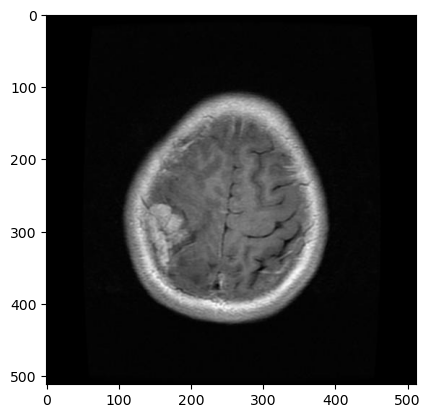

In [22]:
img = mpimg.imread('brain_tumor_dataset/Training/meningioma/Tr-me_0012.jpg')
imgplot = plt.imshow(img)
plt.show()

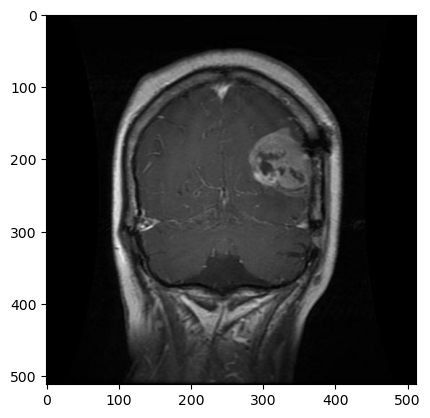

In [23]:
img = mpimg.imread('brain_tumor_dataset/Training/glioma/Tr-gl_0021.jpg')
imgplot = plt.imshow(img)
plt.show()

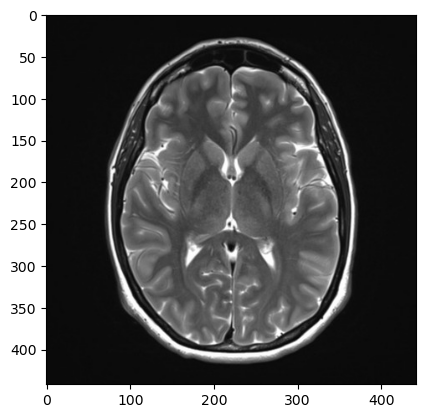

In [24]:
img = mpimg.imread('brain_tumor_dataset/Training/notumor/Tr-no_0017.jpg')
imgplot = plt.imshow(img)
plt.show()

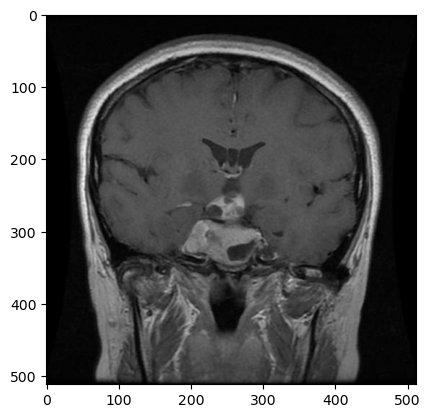

In [25]:
img = mpimg.imread('brain_tumor_dataset/Training/pituitary/Tr-pi_0016.jpg')
imgplot = plt.imshow(img)
plt.show()


# image processing
# 1.Resize the images
# 2.convert the  images to numpy arrays

In [26]:
import os
from PIL import Image
import numpy as np

In [27]:
glioma_path = "brain_tumor_dataset/Training/glioma"
label_map = {
    'glioma': 0,
    'meningioma': 1,
    'notumor': 2,
    'pituitary': 3
}
valid_extensions = ('.jpg', '.jpeg', '.png')

data = []
labels = []

for img_file in os.listdir(glioma_path):
    if img_file.lower().endswith(valid_extensions):
        img_path = os.path.join(glioma_path, img_file)

        try:
            image = Image.open(img_path).convert('RGB')
            image = image.resize((128, 128))
            image = np.array(image)

            data.append(image)
            labels.append(label_map['glioma'])  # label = 1

        except Exception as e:
            print(f"Skipped {img_file}: {e}")
    else:
        print(f"Skipped non-image file: {img_file}")

data = np.array(data)
labels = np.array(labels)

print(f"Loaded {len(data)} glioma tumor images")


Skipped non-image file: .ipynb_checkpoints
Loaded 1321 glioma tumor images


In [28]:


meningioma_path = "brain_tumor_dataset/Training/meningioma"
label_map = {
    'glioma': 0,
    'meningioma': 1,
    'notumor': 2,
    'pituitary': 3
}
valid_extensions = ('.jpg', '.jpeg', '.png')

data = []
labels = []

for img_file in os.listdir(meningioma_path):
    if img_file.lower().endswith(valid_extensions):
        img_path = os.path.join(meningioma_path, img_file)

        try:
            image = Image.open(img_path).convert('RGB')
            image = image.resize((128, 128))
            image = np.array(image)

            data.append(image)
            labels.append(label_map['meningioma'])  # label = 2

        except Exception as e:
            print(f"Skipped {img_file}: {e}")
    else:
        print(f"Skipped non-image file: {img_file}")

data = np.array(data)
labels = np.array(labels)

print(f"Loaded {len(data)} meningioma tumor images")


Skipped non-image file: .ipynb_checkpoints
Loaded 1339 meningioma tumor images


In [29]:


notumor_path = "brain_tumor_dataset/Training/notumor"
label_map = {
    'glioma': 0,
    'meningioma': 1,
    'notumor': 2,
    'pituitary': 3
}
valid_extensions = ('.jpg', '.jpeg', '.png')

data = []
labels = []

for img_file in os.listdir(notumor_path):
    if img_file.lower().endswith(valid_extensions):
        img_path = os.path.join(notumor_path, img_file)

        try:
            image = Image.open(img_path).convert('RGB')
            image = image.resize((128, 128))
            image = np.array(image)

            data.append(image)
            labels.append(label_map['notumor'])  # label = 3

        except Exception as e:
            print(f"Skipped {img_file}: {e}")
    else:
        print(f"Skipped non-image file: {img_file}")

data = np.array(data)
labels = np.array(labels)

print(f"Loaded {len(data)} no tumor images")


Skipped non-image file: .ipynb_checkpoints
Loaded 1595 no tumor images


In [30]:
 

pituitary_path = "brain_tumor_dataset/Training/pituitary"
label_map = {
    'glioma': 0,
    'meningioma': 1,
    'notumor': 2,
    'pituitary': 3
}
valid_extensions = ('.jpg', '.jpeg', '.png')

data = []
labels = []

for img_file in os.listdir(pituitary_path):
    if img_file.lower().endswith(valid_extensions):
        img_path = os.path.join(pituitary_path, img_file)

        try:
            image = Image.open(img_path).convert('RGB')
            image = image.resize((128, 128))
            image = np.array(image)

            data.append(image)
            labels.append(label_map['pituitary'])  # label = 0

        except Exception as e:
            print(f"Skipped {img_file}: {e}")
    else:
        print(f"Skipped non-image file: {img_file}")

# Convert lists to numpy arrays if needed
data = np.array(data)
labels = np.array(labels)

print(f"Loaded {len(data)} pituitary tumor images")



Loaded 1457 pituitary tumor images


In [31]:


glioma_test_path = "brain_tumor_dataset/Testing/glioma"
label_map = {
    'glioma': 0,
    'meningioma': 1,
    'notumor': 2,
    'pituitary': 3
}
valid_extensions = ('.jpg', '.jpeg', '.png')

data = []
labels = []

for img_file in os.listdir(glioma_test_path):
    if img_file.lower().endswith(valid_extensions):
        img_path = os.path.join(glioma_test_path, img_file)

        try:
            image = Image.open(img_path).convert('RGB')
            image = image.resize((128, 128))
            image = np.array(image)

            data.append(image)
            labels.append(label_map['glioma'])  # label = 1

        except Exception as e:
            print(f"Skipped {img_file}: {e}")
    else:
        print(f"Skipped non-image file: {img_file}")

data = np.array(data)
labels = np.array(labels)

print(f"Loaded {len(data)} glioma tumor test images")




Loaded 300 glioma tumor test images


In [32]:


meningioma_test_path = "brain_tumor_dataset/Testing/meningioma"
label_map = {
    'glioma': 0,
    'meningioma': 1,
    'notumor': 2,
    'pituitary': 3
}
valid_extensions = ('.jpg', '.jpeg', '.png')

data = []
labels = []

for img_file in os.listdir(meningioma_test_path):
    if img_file.lower().endswith(valid_extensions):
        img_path = os.path.join(meningioma_test_path, img_file)

        try:
            image = Image.open(img_path).convert('RGB')
            image = image.resize((128, 128))
            image = np.array(image)

            data.append(image)
            labels.append(label_map['meningioma'])  # label = 2

        except Exception as e:
            print(f"Skipped {img_file}: {e}")
    else:
        print(f"Skipped non-image file: {img_file}")

data = np.array(data)
labels = np.array(labels)

print(f"Loaded {len(data)} meningioma tumor test images")





Loaded 306 meningioma tumor test images


In [33]:


notumor_test_path = "brain_tumor_dataset/Testing/notumor"
label_map = {
    'glioma': 0,
    'meningioma': 1,
    'notumor': 2,
    'pituitary': 3
}
valid_extensions = ('.jpg', '.jpeg', '.png')

data = []
labels = []

for img_file in os.listdir(notumor_test_path):
    if img_file.lower().endswith(valid_extensions):
        img_path = os.path.join(notumor_test_path, img_file)

        try:
            image = Image.open(img_path).convert('RGB')
            image = image.resize((128, 128))
            image = np.array(image)

            data.append(image)
            labels.append(label_map['notumor'])  # label = 3

        except Exception as e:
            print(f"Skipped {img_file}: {e}")
    else:
        print(f"Skipped non-image file: {img_file}")

data = np.array(data)
labels = np.array(labels)

print(f"Loaded {len(data)} no tumor test images")


Loaded 405 no tumor test images


In [34]:


pituitary_test_path = "brain_tumor_dataset/Testing/pituitary"
label_map = {
    'glioma': 0,
    'meningioma': 1,
    'notumor': 2,
    'pituitary': 3
}
valid_extensions = ('.jpg', '.jpeg', '.png')

data = []
labels = []

for img_file in os.listdir(pituitary_test_path):
    if img_file.lower().endswith(valid_extensions):
        img_path = os.path.join(pituitary_test_path, img_file)

        try:
            image = Image.open(img_path).convert('RGB')
            image = image.resize((128, 128))
            image = np.array(image)

            data.append(image)
            labels.append(label_map['pituitary'])  # label = 0

        except Exception as e:
            print(f"Skipped {img_file}: {e}")
    else:
        print(f"Skipped non-image file: {img_file}")

data = np.array(data)
labels = np.array(labels)

print(f"Loaded {len(data)} pituitary tumor test images")


Loaded 300 pituitary tumor test images


In [35]:


def load_images_from_folder(folder_path, label):
    data = []
    labels = []
    valid_extensions = ('.jpg', '.jpeg', '.png')

    for img_file in os.listdir(folder_path):
        if img_file.lower().endswith(valid_extensions):
            img_path = os.path.join(folder_path, img_file)
            try:
                image = Image.open(img_path).convert('RGB')
                image = image.resize((128, 128))
                image = np.array(image)
                data.append(image)
                labels.append(label)
            except Exception as e:
                print(f"Skipped {img_file}: {e}")
        else:
            print(f"Skipped non-image file: {img_file}")

    return np.array(data), np.array(labels)


In [36]:
data_glioma, labels_glioma = load_images_from_folder('brain_tumor_dataset/Training/glioma', 0)
data_meningioma, labels_meningioma = load_images_from_folder('brain_tumor_dataset/Training/meningioma', 1)
data_notumor, labels_notumor = load_images_from_folder('brain_tumor_dataset/Training/notumor', 2)
data_pituitary, labels_pituitary = load_images_from_folder('brain_tumor_dataset/Training/pituitary', 3)
# Combine test data and labels
X_train = np.concatenate([data_glioma, data_meningioma, data_notumor,data_pituitary], axis=0)
y_train = np.concatenate([labels_glioma, labels_meningioma, labels_notumor,labels_pituitary], axis=0)

print(f"Total test images loaded: {len(X_train)}")   


Skipped non-image file: .ipynb_checkpoints
Skipped non-image file: .ipynb_checkpoints
Skipped non-image file: .ipynb_checkpoints
Total test images loaded: 5712


In [37]:
data_glioma_test, labels_glioma_test = load_images_from_folder('brain_tumor_dataset/Testing/glioma', 0)
data_meningioma_test, labels_meningioma_test = load_images_from_folder('brain_tumor_dataset/Testing/meningioma', 1)
data_notumor_test, labels_notumor_test = load_images_from_folder('brain_tumor_dataset/Testing/notumor', 2)
data_pituitary_test, labels_pituitary_test = load_images_from_folder('brain_tumor_dataset/Testing/pituitary', 3)
                                                                    
# Combine test data and labels
X_test = np.concatenate([data_glioma_test, data_meningioma_test, data_notumor_test,data_pituitary_test], axis=0)
y_test = np.concatenate([labels_glioma_test, labels_meningioma_test, labels_notumor_test,labels_pituitary_test], axis=0)

print(f"Total test images loaded: {len(X_test)}")                                                                    

Total test images loaded: 1311


In [38]:
# Assuming you've already loaded and labeled your data
X_train = X_train / 255.0
X_test = X_test / 255.0

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)


In [39]:
# --- CHANGE 2: Calculate Class Weights for Imbalance Correction ---
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))

print("\n--- Calculated Class Weights (Index 1 is Meningioma) ---")
print(f"0 (Glioma): {class_weight_dict[0]:.2f}")
print(f"1 (Meningioma): {class_weight_dict[1]:.2f}") 
print(f"2 (No Tumor): {class_weight_dict[2]:.2f}")
print(f"3 (Pituitary): {class_weight_dict[3]:.2f}")
print("------------------------------------------------------\n")
# ---------------------------------------------------------------



--- Calculated Class Weights (Index 1 is Meningioma) ---
0 (Glioma): 1.08
1 (Meningioma): 1.07
2 (No Tumor): 0.90
3 (Pituitary): 0.98
------------------------------------------------------



In [40]:
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:

IMG_SIZE = (128, 128)   # 👈 Define this before using it
num_of_classes = 4

# -----------------------------
# LOAD BASE MODEL (MOBILENETV2)
# -----------------------------
base_model = MobileNetV2(
    input_shape=IMG_SIZE + (3,),  # becomes (128, 128, 3)
    include_top=False,
    weights='imagenet'
)


# Freeze the base model layers
base_model.trainable = False

# -----------------------------
# BUILD MODEL
# -----------------------------
model = keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_of_classes, activation='softmax')
])

In [42]:
# Compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
# --------------------------------

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator



datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

In [44]:

# --- CHANGE 7: Explicitly define the data generator for cleaner fit call ---
train_generator = datagen.flow(X_train, y_train, batch_size=32)

# --- CHANGE 4: Apply the calculated class weights during fitting ---
model.fit(train_generator,
          validation_data=(X_test, y_test),
          epochs=30,
          class_weight=class_weight_dict)

C:\Users\VIpin\Desktop\project\env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 67s 320ms/step - accuracy: 0.8095 - loss: 0.5146 - val_accuracy: 0.8543 - val_loss: 0.4055
Epoch 2/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 55s 309ms/step - accuracy: 0.8739 - loss: 0.3507 - val_accuracy: 0.8528 - val_loss: 0.3850
Epoch 3/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 55s 307ms/step - accuracy: 0.8848 - loss: 0.3131 - val_accuracy: 0.8558 - val_loss: 0.3408
Epoch 4/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 55s 307ms/step - accuracy: 0.8948 - loss: 0.2911 - val_accuracy: 0.8459 - val_loss: 0.3690
Epoch 5/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 56s 311ms/step - accuracy: 0.9011 - loss: 0.2678 - val_accuracy: 0.8780 - val_loss: 0.2930
Epoch 6/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 54s 303ms/step - accuracy: 0.9098 - loss: 0.2505 - val_accuracy: 0.8474 - val_loss: 0.3777
Epoch 7/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 54s 304ms/step - accuracy: 0.9163 - loss: 0.2326 - val_accuracy: 0.8902 - val_loss: 0.2744
Epoch 8/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 55s 304ms/step - accuracy: 0.9153 - loss: 0

In [45]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.9207 - loss: 0.2251
Test accuracy: 0.9207


In [46]:
# 1. Get predictions (probabilities)
y_pred_probs = model.predict(X_test)
# 2. Convert probabilities to class indices
y_pred = np.argmax(y_pred_probs, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step


In [47]:
from sklearn.metrics import classification_report, confusion_matrix


In [48]:
print("\n--- Model Diagnosis: Classification Report ---")
# Use target_names for readability
target_names = ['glioma (0)', 'meningioma (1)', 'notumor (2)', 'pituitary (3)']
print(classification_report(y_test, y_pred, target_names=target_names))

print("\n--- Model Diagnosis: Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
# Print matrix with labels
print("Labels: [glioma (0), meningioma (1), notumor (2), pituitary (3)]")
print(cm)
print("------------------------------------------------------\n")
# -----------------------------------------------------------------------------



--- Model Diagnosis: Classification Report ---
                precision    recall  f1-score   support

    glioma (0)       0.97      0.87      0.92       300
meningioma (1)       0.90      0.81      0.85       306
   notumor (2)       0.95      1.00      0.97       405
 pituitary (3)       0.87      0.98      0.92       300

      accuracy                           0.92      1311
     macro avg       0.92      0.91      0.92      1311
  weighted avg       0.92      0.92      0.92      1311


--- Model Diagnosis: Confusion Matrix ---
Labels: [glioma (0), meningioma (1), notumor (2), pituitary (3)]
[[261  26   4   9]
 [  7 248  15  36]
 [  1   1 403   0]
 [  1   2   2 295]]
------------------------------------------------------



In [49]:
model.save("brain_tumor_model.keras", include_optimizer=False)

model = keras.models.load_model("brain_tumor_model.keras", compile=False)



Enter full path to image: brain_tumor_dataset/Training/meningioma/Tr-me_0011.jpg


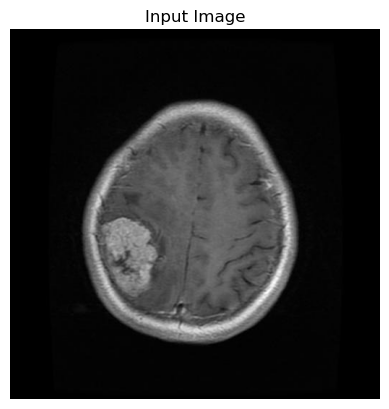

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step

✅ Custom Prediction complete!
Prediction probabilities: [[1.0794121e-03 9.9889970e-01 1.5662194e-05 5.2880450e-06]]
🧠 Predicted Tumor Type: meningioma
------------------------------------------


In [52]:
# Label map
label_map = {
    'glioma': 0,

    
    'meningioma': 1,
    'notumor': 2,
    'pituitary': 3
}
# Reverse map for printing readable label
index_to_label = {v: k for k, v in label_map.items()}

# Get image path
# NOTE: The input function only reads what you type, it does not display the default path.
# Suggested path is: brain_tumor_dataset/Testing/meningioma/Te-me_0018.jpg
image_path = input("Enter full path to image:") 

# Load image
# We must use Image.open from PIL to load the image exactly like we did during training
try:
    image = Image.open(image_path).convert('RGB')
except Exception as e:
    print(f"❌ Failed to load image: {e}")
    print("Please ensure the path is correct and the file exists.")
    exit()

# Show image (using matplotlib for consistency)
plt.imshow(image)
plt.title("Input Image")
plt.axis("off")
plt.show()

# Preprocess: Must match training size and scaling
resized = image.resize(IMG_SIZE)
scaled = np.array(resized) / 255.0
# Add batch dimension (1, 128, 128, 3)
reshaped = np.reshape(scaled, (1, IMG_SIZE[0], IMG_SIZE[1], 3)) 

# Predict
prediction = model.predict(reshaped)
predicted_class_index = np.argmax(prediction)
predicted_class = index_to_label[predicted_class_index]

print("\n✅ Custom Prediction complete!")
print("Prediction probabilities:", prediction)
print(f"🧠 Predicted Tumor Type: {predicted_class}")
print("------------------------------------------")